# Motifs important to PolyaStrength

**Purpose**: To identify motifs important to site strength through a systematic mutation approach.


In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
%run -i notebook_setup.py

## IMPORTS AND SETUP

In [4]:
from paper_utilities import motifs
from matplotlib_venn import venn2


In [5]:
species   = 'saccharomyces_cerevisiae'
modeltype = 'polyastrength'
config    = 'polyastrength_kmers-6'
kmer      = 6


In [6]:
PROJECT   = "/projects/b1080/eks/polyadenylation/yeast/"
OUTDIR    = os.path.join(PROJECT, 'manuscript', 'analysis', 'polyastrength_motif_importance')
RESOURCES = os.path.join(os.path.dirname(OUTDIR), 'resources')
os.makedirs(OUTDIR, exist_ok = True)


In [7]:
## Load model configuration information

with open(os.path.join(RESOURCES, 'polyastrength_configurations.pickle'), mode = 'rb') as handle:
    configurations = pickle.load(handle)

gold_sites = configurations[species][config]['golden_lines']
print("\nNumber of golden sites:", gold_sites)

mot_dis_dir = os.path.join(PROJECT, species, 'analysis', 'motif_analysis', 'motif_disruption', config)
print("\nDirectory containing motif disruption results:", mot_dis_dir)



Number of golden sites: 9725

Directory containing motif disruption results: /projects/b1080/eks/polyadenylation/yeast/saccharomyces_cerevisiae/analysis/motif_analysis/motif_disruption/polyastrength_kmers-6


In [8]:
## Load motif family definitions for S. cerevisiae

scer_definitions = {'patterns' : {}, 'distance' : {}}

# By pattern - we only look at pattern families for 6mers
with open(os.path.join(RESOURCES, f'motif_definitions.scer.6mers.patterns.pickle'), mode = 'rb') as handle:
    scer_definitions['patterns'][6] = pickle.load(handle)
    
scer_definitions['patterns'][5] = {'family':{}}
scer_definitions['patterns'][4] = {'family':{}}

# By Hamming distance
for kmer in [4,5,6]:
    with open(os.path.join(RESOURCES, f'motif_definitions.scer.{kmer}mers.distance.pickle'), mode = 'rb') as handle:
        scer_definitions['distance'][kmer] = pickle.load(handle)


In [9]:
## Load processed PolyaClassifier information

# Motif family importance profiles

with open(os.path.join(RESOURCES, 'polyaclassifier_motifs.summaries.pickle'), mode = 'rb') as handle:
    class_summaries = pickle.load(handle)
    
cond1 = (class_summaries['species'] == species)
cond2 = (class_summaries['modeltype'] == 'polyaclassifier')
cond3 = (class_summaries['kmer'] == kmer)
    
class_summaries = class_summaries.loc[cond1 & cond2 & cond3].copy()
print(class_summaries.shape)

# Significant motifs

with open(os.path.join(RESOURCES, 'polyaclassifier_motifs.significant_motifs.pickle'), mode = 'rb') as handle:
    significant_motifs = pickle.load(handle)

class_sigmots = significant_motifs[species]['polyaclassifier']['polyaclassifier_bagging3_kmers-6']
print(f"PolyaClassifier significant motifs = {len(class_sigmots)}")


(4096, 28)
PolyaClassifier significant motifs = 137


In [10]:
## Load processed PolyaStrength information

# Motif family importance profiles

with open(os.path.join(RESOURCES, 'polyastrength_motifs.summaries.pickle'), mode = 'rb') as handle:
    strength_summaries = pickle.load(handle)
    
cond1 = (strength_summaries['species'] == species)
cond2 = (strength_summaries['modeltype'] == modeltype)
cond3 = (strength_summaries['kmer'] == kmer)
    
strength_summaries = strength_summaries.loc[cond1 & cond2 & cond3].copy()
print(strength_summaries.shape)

# Significant motifs

with open(os.path.join(RESOURCES, 'polyastrength_motifs.significant_motifs.pickle'), mode = 'rb') as handle:
    significant_motifs = pickle.load(handle)

sigmots = significant_motifs[species][modeltype][config]
print(f"PolyaStrength significant motifs = {len(sigmots)}")


(4096, 28)
PolyaStrength significant motifs = 246


In [11]:
with open(os.path.join(RESOURCES, 'polyastrength_motifs.family_profiles.pickle'), mode = 'rb') as handle:
    mfam_importance = pickle.load(handle)
    

# ANALYSIS

In [12]:
family_cmap = {
    'A-rich'        : '#2278B5',
    'A-rich_d0'     : '#2278B5',
    'A-rich_d1'     : '#6AB1E3',
    'A-rich_d2'     : '#9CCBEC',
    'T-rich'        : '#2FA148',
    'T-rich_d0'     : '#2FA148',
    'T-rich_d1'     : '#73D689',
    'T-rich_d2'     : '#A1E4B0',
    'TA/TA-rich'    : '#D62A28',
    'TA/TA-rich_d0' : '#D62A28',
    'TA/TA-rich_d1' : '#E77F7E',
    'TA/TA-rich_d2' : '#EFAAA9',
    'Other'         : '#F7F8F8',
    'NA'            : '#F7F8F8',
    'Pattern'       : '#000000',
}


## Comparison of motif importance between site identification and strength

#### Overlap between PolyaClassifier and PolyaStrength significant motifs

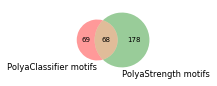


Common significant motifs (N=68):
AAAAAA,AAAAAG,AAAAAT,AAAAGA,AAAAGG,AAAGAA,AAAGGA,AAATAA,AAGAAA,AAGAAG,AAGGAA,AATAAA,AATAAT,AATATA,ACATAT,AGAAAA,ATAAAA,ATAAAT,ATAATA,ATACAT,ATATAA,ATATAC,ATATAG,ATATAT,ATATGT,ATGTAA,ATGTAT,CCTTTT,CTATAT,CTTTTC,CTTTTT,GAAAAA,GAAAAG,GAAGAG,GGAAAA,GTATAT,GTATGT,GTTTTT,TAAAAA,TAAATA,TAATAA,TAATAT,TACATA,TACGTA,TAGATA,TATAAA,TATAAT,TATAGA,TATATA,TATGTA,TCTATA,TCTTTC,TCTTTT,TGTATA,TGTTTT,TTATAT,TTATGT,TTCTTC,TTCTTT,TTTATA,TTTCTT,TTTGTT,TTTTCC,TTTTCT,TTTTGT,TTTTTC,TTTTTG,TTTTTT

PolyaClassifier unique motifs (N=69):
AAAATT,AAATAT,AAATTT,AAGAGA,AATTTT,ACTTTT,AGAAAG,AGAAGA,AGAAGG,AGGAAA,ATATTT,ATGAAG,ATTATT,ATTTAT,ATTTCT,ATTTTA,ATTTTC,ATTTTT,CAAAAA,CAAGAA,CATATA,CATTTT,CTTTTA,GAAAGA,GAAGAA,GAAGAT,GATGAA,GGAAGA,GGTGAA,TAATTT,TACTTT,TATACA,TATATG,TATATT,TATTAT,TATTTA,TATTTT,TCATTT,TGAAAA,TGAAGA,TGATGA,TGGAAA,TGGTGA,TTAATT,TTACTT,TTATTA,TTATTT,TTCATT,TTCCTT,TTCTAT,TTGAAA,TTGAAG,TTGTAT,TTGTTT,TTTAAT,TTTACT,TTTATT,TTTCAA,TTTCAT,TTTCCT,TTTCTA,TTTGAA,TTTGTA,TTTTAA,TT

In [13]:
fig,ax = plt.subplots(1,1, figsize = (1.5,1.5))
venn2([set(class_sigmots), set(sigmots)], set_labels = ['PolyaClassifier motifs','PolyaStrength motifs'], ax = ax)
plt.show()

motifs_common = [m for m in sigmots if (m in class_sigmots)]
motifs_class_only = [m for m in class_sigmots if (m not in sigmots)]
motifs_strength_only = [m for m in sigmots if (m not in class_sigmots)]

print(f"\nCommon significant motifs (N={len(motifs_common)}):\n{','.join(sorted(motifs_common))}")
print(f"\nPolyaClassifier unique motifs (N={len(motifs_class_only)}):\n{','.join(sorted(motifs_class_only))}")
print(f"\nPolyaStrength unique motifs (N={len(motifs_strength_only)}):\n{','.join(sorted(motifs_strength_only))}")


#### Correlation in motif importance scores between PolyaClassifier and PolyaStrength

In [14]:
measure = 'extreme_weights_log1p'

wide_summaries = (
    pd.concat([class_summaries, strength_summaries])
    .pivot(index = 'testMotif', columns = 'modeltype', values = measure)
    .reset_index()
    .merge(class_summaries[['testMotif','hammingFamily','overallFamily']].drop_duplicates(), on = 'testMotif', how = 'left')
)

In [15]:
print(wide_summaries['polyaclassifier'].describe())

count    4096.000000
mean        1.697566
std         0.616981
min        -0.185119
25%         1.252496
50%         1.674616
75%         2.096523
max         4.012772
Name: polyaclassifier, dtype: float64


In [16]:
print(wide_summaries['polyastrength'].describe())

count    4096.000000
mean        0.961781
std         0.717893
min        -0.895670
25%         0.379688
50%         0.917102
75%         1.471110
max         3.499634
Name: polyastrength, dtype: float64


4096 4092 3797 3795


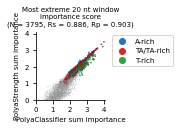

In [17]:
fig,ax = plt.subplots(1,1, figsize = (1.25,1.25))

cond1 = (~wide_summaries.isna().any(axis=1))
cond2 = (wide_summaries['polyaclassifier'] > 0)
cond3 = (wide_summaries['polyastrength'] > 0)

condPLOT = (cond1 & cond2 & cond3)
print(cond1.sum(), cond2.sum(), cond3.sum(), condPLOT.sum())

plot_data = wide_summaries.loc[condPLOT]

sns.scatterplot(data = plot_data.loc[plot_data['overallFamily'] == 'Other'], 
                x = 'polyaclassifier', y = 'polyastrength',
                color = 'lightgray', edgecolor = 'black',
                s = 1, alpha = 0.25, zorder = 1, ax = ax)

sns.scatterplot(data = plot_data.loc[plot_data['overallFamily'] != 'Other'], 
                x = 'polyaclassifier', y = 'polyastrength',
                hue = 'overallFamily', palette = family_cmap, edgecolor = 'black',
                s = 2, alpha = 1, zorder = 2, ax = ax)

ax.set_xlabel("PolyaClassifier sum importance")
ax.set_xlim(0,4.1)
ax.xaxis.set_major_locator(MultipleLocator(1))

ax.set_ylabel("PolyaStrength sum importance")
ax.set_ylim(0,4.1)
ax.yaxis.set_major_locator(MultipleLocator(1))

ax.legend(bbox_to_anchor = (1.05,1))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_title(f"Most extreme 20 nt window\nimportance score\n(N = {len(plot_data)}, Rs = {st.spearmanr(plot_data['polyaclassifier'],plot_data['polyastrength'])[0]:.03f}, Rp = {st.pearsonr(plot_data['polyaclassifier'],plot_data['polyastrength'])[0]:.03f})", fontsize = 7)

plt.savefig(os.path.join(OUTDIR, 'motif_importance_comparison.scatter.peak_mean_window.color_family.svg'), format = 'svg', dpi = 600)
plt.show()


## Overall motif family importance profiles

In [18]:
for motfam,motdict in mfam_importance[species][modeltype][config].items():
    
    if ("_d" in motfam) or ("pattern_" in motfam) or ("contains_" in motfam):
        continue
        
    print(f"{motfam}: N = {len(motdict['motifs'])}")
    

hamming_A-rich: N = 39
hamming_T-rich: N = 32
hamming_TA/TA-rich: N = 74


#### Sum importance score per motif

hamming_A-rich peak score: 21.560 @ position -21
hamming_T-rich peak score: 15.632 @ position -6
hamming_TA/TA-rich peak score: 24.677 @ position -36


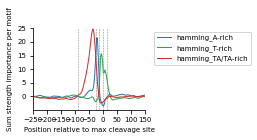

In [19]:
fig,ax = plt.subplots(1,1, figsize = (2,1.5))

smoothing = 10
region = (-250,150)

for motfam,motdict in mfam_importance[species][modeltype][config].items():
    
    if ("_d" in motfam) or ("pattern_" in motfam) or ("contains_" in motfam):
        continue
    
    try:
        xs           = motdict['data']['xs']
        means        = -1*motdict['data']['means_weights'] / len(motdict['motifs'])
        means_smooth = pd.Series(means).rolling(window = smoothing, center = True).mean()
        print(f"{motfam} peak score: {np.max(means_smooth):.03f} @ position {xs[means_smooth.idxmax()]}")

        sns.lineplot(x = xs, y = means_smooth, color = family_cmap[motfam.replace("hamming_", "")], label = motfam, lw = 1, ax = ax)

    except KeyError:
        continue
    
for x in [-90,-25,-15,0,15]:
    ax.axvline(x = x, linewidth = 0.5, linestyle = 'dashed', color = 'gray', zorder = 0)

ax.set_xlim(region)
ax.xaxis.set_major_locator(MultipleLocator(50))

ax.set_ylim(None,25)
ax.yaxis.set_major_locator(MultipleLocator(5))
ax.set_ylabel("Sum strength importance per motif")
ax.set_xlabel("Position relative to max cleavage site")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.legend(bbox_to_anchor = (1.05,1))

plt.savefig(os.path.join(OUTDIR, 'family_consolidated.strength_importance.sum_norm.wide.svg'), format = 'svg', dpi = 600, transparent = True)
plt.show()


hamming_A-rich peak score: 21.560 @ position -21
hamming_T-rich peak score: 15.632 @ position -6
hamming_TA/TA-rich peak score: 24.677 @ position -36


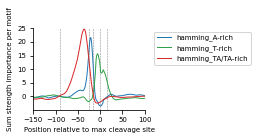

In [20]:
fig,ax = plt.subplots(1,1, figsize = (2,1.5))

smoothing = 10
region = (-150,100)

for motfam,motdict in mfam_importance[species][modeltype][config].items():
    
    if ("_d" in motfam) or ("pattern_" in motfam) or ("contains_" in motfam):
        continue
        
    try:

        xs           = motdict['data']['xs']
        means        = -1*motdict['data']['means_weights'] / len(motdict['motifs'])
        means_smooth = pd.Series(means).rolling(window = smoothing, center = True).mean()
        print(f"{motfam} peak score: {np.max(means_smooth):.03f} @ position {xs[means_smooth.idxmax()]}")

        sns.lineplot(x = xs, y = means_smooth, color = family_cmap[motfam.replace("hamming_", "")], label = motfam, lw = 1, ax = ax)
        
    except KeyError:
        continue

for x in [-90,-25,-15,0,15]:
    ax.axvline(x = x, linewidth = 0.5, linestyle = 'dashed', color = 'gray', zorder = 0)

ax.set_xlim(region)
ax.xaxis.set_major_locator(MultipleLocator(50))

ax.set_ylim(None,25)
ax.yaxis.set_major_locator(MultipleLocator(5))
ax.set_ylabel("Sum strength importance per motif")
ax.set_xlabel("Position relative to max cleavage site")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.legend(bbox_to_anchor = (1.05,1))

plt.savefig(os.path.join(OUTDIR, 'family_consolidated.strength_importance.sum_norm.zoom.svg'), format = 'svg', dpi = 600, transparent = True)
plt.show()


#### Frequency per motif

hamming_A-rich peak frequency: 20.977 @ position -21
hamming_T-rich peak frequency: 26.084 @ position -8
hamming_TA/TA-rich peak frequency: 20.453 @ position -40


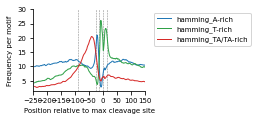

In [21]:
fig,ax = plt.subplots(1,1, figsize = (2,1.5))

smoothing = 10
region = (-250,150)

for motfam,motdict in mfam_importance[species][modeltype][config].items():
    
    if ("_d" in motfam) or ("pattern_" in motfam) or ("contains_" in motfam):
        continue
    
    try:
        xs           = motdict['data']['xs']
        means        = motdict['data']['freqs'] / len(motdict['motifs'])
        means_smooth = pd.Series(means).rolling(window = smoothing, center = True).mean()
        print(f"{motfam} peak frequency: {np.max(means_smooth):.03f} @ position {xs[means_smooth.idxmax()]}")

        sns.lineplot(x = xs, y = means_smooth, color = family_cmap[motfam.replace("hamming_", "")], label = motfam, lw = 1, ax = ax)
        
    except KeyError:
        continue

for x in [-90,-25,-15,0,15]:
    ax.axvline(x = x, linewidth = 0.5, linestyle = 'dashed', color = 'gray', zorder = 0)

ax.set_xlim(region)
ax.xaxis.set_major_locator(MultipleLocator(50))

ax.set_ylim(None,30)
ax.yaxis.set_major_locator(MultipleLocator(5))
ax.set_ylabel("Frequency per motif")
ax.set_xlabel("Position relative to max cleavage site")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.legend(bbox_to_anchor = (1.05,1))

plt.savefig(os.path.join(OUTDIR, 'family_consolidated.strength_importance.freq_norm.wide.svg'), format = 'svg', dpi = 600, transparent = True)
plt.show()


hamming_A-rich peak score: 20.977 @ position -21
hamming_T-rich peak score: 26.084 @ position -8
hamming_TA/TA-rich peak score: 20.453 @ position -40


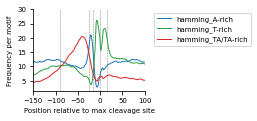

In [22]:
fig,ax = plt.subplots(1,1, figsize = (2,1.5))

smoothing = 10
region = (-150,100)

for motfam,motdict in mfam_importance[species][modeltype][config].items():
    
    if ("_d" in motfam) or ("pattern_" in motfam) or ("contains_" in motfam):
        continue
    
    try:
        xs           = motdict['data']['xs']
        means        = motdict['data']['freqs'] / len(motdict['motifs'])
        means_smooth = pd.Series(means).rolling(window = smoothing, center = True).mean()
        print(f"{motfam} peak score: {np.max(means_smooth):.03f} @ position {xs[means_smooth.idxmax()]}")

        sns.lineplot(x = xs, y = means_smooth, color = family_cmap[motfam.replace("hamming_", "")], label = motfam, lw = 1, ax = ax)
        
    except KeyError:
        continue

for x in [-90,-25,-15,0,15]:
    ax.axvline(x = x, linewidth = 0.5, linestyle = 'dashed', color = 'gray', zorder = 0)

ax.set_xlim(region)
ax.xaxis.set_major_locator(MultipleLocator(50))

ax.set_ylim(None,30)
ax.yaxis.set_major_locator(MultipleLocator(5))
ax.set_ylabel("Frequency per motif")
ax.set_xlabel("Position relative to max cleavage site")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.legend(bbox_to_anchor = (1.05,1))

plt.savefig(os.path.join(OUTDIR, 'family_consolidated.strength_importance.freq_norm.zoom.svg'), format = 'svg', dpi = 600, transparent = True)
plt.show()
